In [7]:
# import all required libraries and files

import json
from logging import raiseExceptions 
from datetime import datetime
import os
import pandas as pd
import os
import requests
import csv
from tqdm import tqdm
import tweepy
import time

api = pd.read_csv("/Users/modeedna/Desktop/SCHOOLS/GEORGETOWN/501 DSAN/Twitter_API.txt")

In [2]:
# grab required keys and tokens
consumer_key        = api[api["Type"]=="API Key"].iloc[0,1]
consumer_secret     = api[api["Type"]=="API Key Secret"].iloc[0,1]
access_token        = api[api["Type"]=="Access Token"].iloc[0,1]
access_token_secret = api[api["Type"]=="Access Token Secret"].iloc[0,1]
bearer_token        = api[api["Type"]=="Bearer Token"].iloc[0,1]

In [5]:
# authorize use of API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
headers = {"Authorization": "Bearer {}".format(bearer_token)}
print(api.verify_credentials().screen_name)

EdnaMode07


In [10]:
# Add the search_twitter function here.
def search_twitter(query, max_results, tweet_fields, bearer_token = bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results={}&{}".format(query,max_results,tweet_fields)

    response = requests.request("GET", url, headers=headers)

    print(response.status_code)

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [48]:
# parameters

tweet_fields = "tweet.fields=text,author_id,created_at,lang"
tweet_res = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
            100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
tweets_jsondata = []
data_path = '/Users/modeedna/Desktop/SCHOOLS/GEORGETOWN/501 DSAN/Labs/Lab 1.2/Data/'
search_tweets = ["FIFAWorldCup"]

for tidx, tval in enumerate(search_tweets):
    tweets_jsondump = []
    for nidx, nval in enumerate(tweet_res):
        json_response = search_twitter(query=tval, max_results=nval, tweet_fields=tweet_fields, bearer_token=bearer_token)
        for i in json_response['data']:
            tweets_jsondata.append(i)
        with open(data_path+tval+'-project-tweets.json', 'w') as json_file:
            json.dump(tweets_jsondata, json_file)
            json_file.close()

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [61]:
import matplotlib.pyplot as plt
open_json = open(data_path+'/FIFAWorldCup-project-tweets.json')
load_json = json.load(open_json)
df_tweet = pd.DataFrame(load_json)

In [62]:
df_tweet

,author_id,created_at,text,lang,id
0,1455887554633289734,2022-09-14T21:38:14.000Z,RT @FIFAWorldCup: The first player to score in...,en,1570165047296663555
1,1535679686235283456,2022-09-14T21:38:13.000Z,Erling...... https://t.co/raEld9YFiV,da,1570165042368094211
2,1094489940329672709,2022-09-14T21:38:10.000Z,RT @FIFAWorldCup: The first player to score in...,en,1570165033069330437
3,3039584074,2022-09-14T21:38:08.000Z,@FIFAWorldCup @ChampionsLeague @Cristiano not ...,en,1570165024546488321
4,4135602742,2022-09-14T21:37:57.000Z,@fifaworldcup_ar @18_voltaren @fahad_almowalad...,ar,1570164979298607105
...,...,...,...,...,...
7795,1431390297389404161,2022-09-14T21:33:43.000Z,RT @cabjedits: Que hace el sobrevalorado de Ri...,es,1570163913232089089
7796,1542474733005963264,2022-09-14T21:33:42.000Z,RT @FIFAWorldCup: Nobody can stop @ErlingHaala...,en,1570163907859300352
7797,1444408292915261440,2022-09-14T21:33:41.000Z,RT @AscoALasPlumas: Los de @AUFOficial y @auda...,es,1570163905099403272
7798,900224269,2022-09-14T21:33:41.000Z,"Any which way, just stick it away #goalscorer ...",en,1570163903400902657


In [67]:
# create a function that'll count the usage of words throughout the tweets
def keyword_counter(keyword):
    counter = 0
    for i in range(0,7800):
        if keyword in df_tweet.iloc[i,2]:
            counter += 1
    return counter

In [68]:
# for loop to populate a dictionary and turn it into a dataframe
df = []
countries = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'IR', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia',
            'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']
for country in countries:
    df.append(
        {
            'Country': country,
            'Amount': keyword_counter(country),
        }
    )
print(pd.DataFrame(df))
cDF = pd.DataFrame(df)

           Country  Amount
0            Qatar       0
1          Ecuador       0
2          Senegal     156
3      Netherlands       0
4          England       0
5               IR       0
6             Iran       0
7              USA       0
8            Wales       0
9        Argentina       0
10    Saudi Arabia       0
11          Mexico       0
12          Poland       0
13          France       0
14       Australia       0
15         Denmark       0
16         Tunisia       0
17           Spain       0
18      Costa Rica       0
19         Germany       0
20           Japan       0
21         Belgium       0
22          Canada     436
23         Morocco       0
24         Croatia       0
25          Brazil       0
26          Serbia       0
27     Switzerland       0
28        Cameroon       0
29        Portugal       0
30           Ghana       0
31         Uruguay       0
32  Korea Republic       0


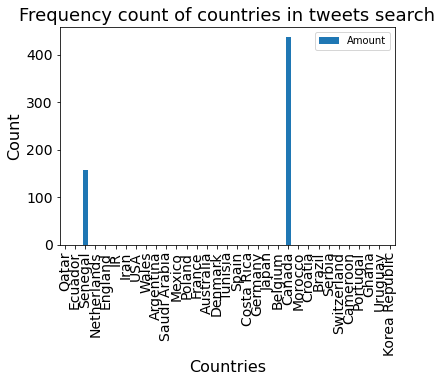

In [69]:
ax = cDF.plot.bar(x='Country')
ax.set_title("Frequency count of countries in tweets search", fontsize=18)
ax.set_xlabel('Countries', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)

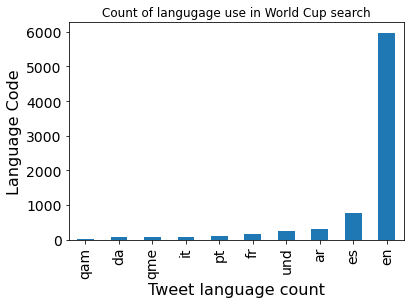

In [70]:
import matplotlib.pyplot as plt
ax = df_tweet.lang.value_counts().sort_values().plot(kind='bar')
ax.set_title("Count of langugage use in World Cup search")
ax.set_xlabel('Tweet language count', fontsize=16)
ax.set_ylabel('Language Code', fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)